# Trabajo Práctico Aprendizaje No Supervisado


---


## Integrantes:


*   Sofia Amante
*   Melisa Caffaratti
*   Mariano Lucero





In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import matplotlib.cm as cm
%matplotlib inline
from sklearn.cluster import KMeans,MeanShift
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

Utilizar la base de jugadores “players_20.csv” disponible en la página de Kaggle https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv . Considerar que la base 2020 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019 (Basarse en las notebooks ntb_clustering_1_fifa2019, ntb_clustering_2_fifa2019 y ntb3_embeddings_fifa2019). Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio (sintético, no muy extenso) .

2- Evaluación visual e intuitiva de a dos variables por vez.

3- Uso de técnicas de clustering: k-Medias, Mean Shift, agregar alguna jerárquica vista en el teórico (sugerencia: usar 'cityblock' como distancia en el jerárquico).

4- Análisis de los clusters encontrados.

5- Embeddings y técnicas de clustering.

6- Evaluación.

7- Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué ?

## 1. Análisis Exploratorio

In [ ]:
#Cargamos datos Fifa 2020
df=pd.read_csv("https://raw.githubusercontent.com/melicaffa/AprendizajeNoSupervisado/master/players_20.csv")
df.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.00,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.00,NaN,2004-07-01,2021.00,NaN,nan,87.00,92.00,92.00,96.00,39.00,66.00,nan,nan,nan,nan,nan,nan,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.00,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.00,NaN,2018-07-10,2022.00,LS,7.00,90.00,93.00,82.00,89.00,35.00,78.00,nan,nan,nan,nan,nan,nan,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.00,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.00,NaN,2017-08-03,2022.00,LW,10.00,91.00,85.00,87.00,95.00,32.00,58.00,nan,nan,nan,nan,nan,nan,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.00,NaN,GK,13.00,NaN,2014-07-16,2023.00,GK,1.00,nan,nan,nan,nan,nan,nan,87.00,92.00,78.00,89.00,52.00,90.00,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La variable 'Overall' se calcula usando otras variables de desempeño del jugador (skills_ratings).

La variable 'Overall' es discreta, así como las otras de desempeño según habilidad ('Crossing', 'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100

Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'.

In [ ]:
best_players_per_position=df.iloc[df.groupby(df['team_position'])['overall'].idxmax()][['team_position','short_name','overall']]
best_players_per_position.sample(10)

,team_position,short_name,overall
109,RF,K. Havertz,84
7,LCB,V. van Dijk,90
3,GK,J. Oblak,91
24,LDM,P. Pogba,88
61,RB,J. Kimmich,86
126,CB,S. de Vrij,84
93,RES,M. Icardi,85
33,LCM,David Silva,88
5,RCM,K. De Bruyne,91
51,LB,Jordi Alba,87


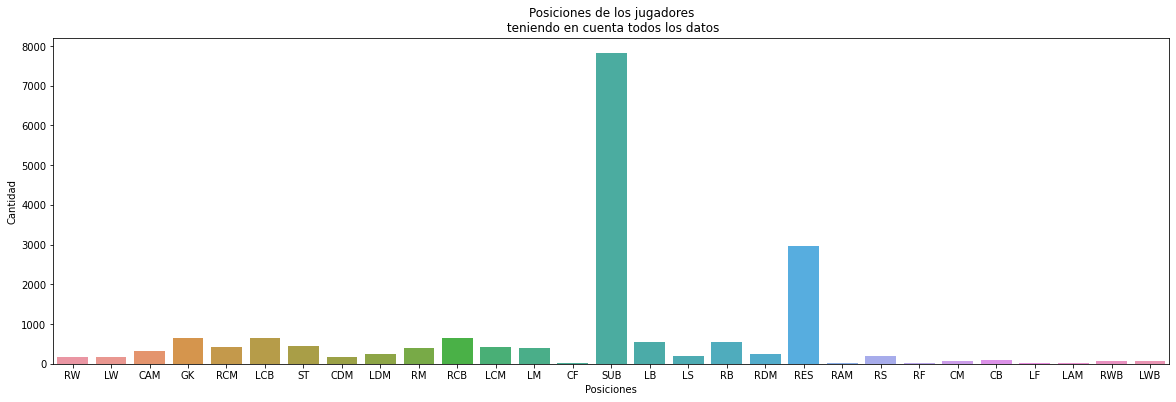

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot('team_position', data = df)
plt.xlabel('Posiciones')
plt.ylabel('Cantidad')
plt.title('Posiciones de los jugadores\n teniendo en cuenta todos los datos')
plt.show()

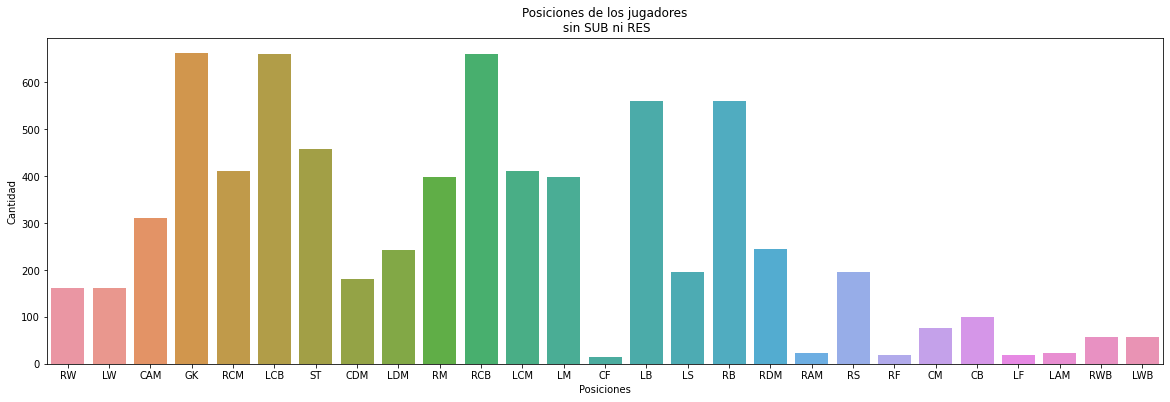

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot('team_position', data = df[(df['team_position']!='SUB') & (df['team_position']!='RES')])
plt.xlabel('Posiciones')
plt.ylabel('Cantidad')
plt.title('Posiciones de los jugadores\n sin SUB ni RES')
plt.show()

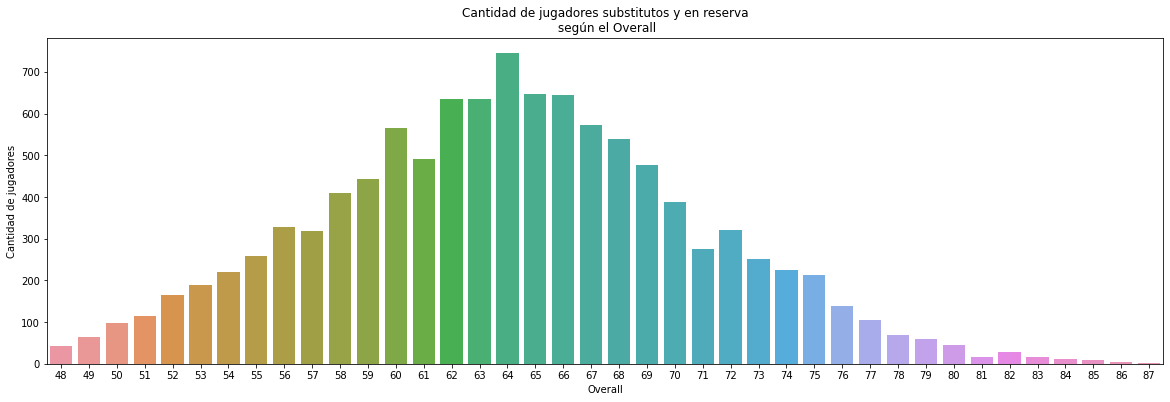

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot('overall', data = df[(df['team_position']=='SUB') | (df['team_position']=='RES')] )
plt.xlabel('Overall')
plt.ylabel('Cantidad de jugadores')
plt.title('Cantidad de jugadores substitutos y en reserva\n según el Overall')
plt.show()

In [ ]:
df[(df['team_position']=='SUB') | (df['team_position']=='RES')].overall.describe()

count   10778.00
mean       64.07
std         6.71
min        48.00
25%        60.00
50%        64.00
75%        68.00
max        87.00
Name: overall, dtype: float64

Vemos que las posiciones en el dataset completo, tiene muchos jugadores en reserva y substitutos (RES y SUB), quedando muy desbalanceado. Al graficarlo sin esas posiciones, queda mucho más equilibrado.
También vemos que según el overall de dichos jugadores, el 50% de ellos tienen un overall entre 60 y 68.

Para el análisis, decidimos excluir a los jugadores *RES* y *SUB* por el bajo rendimiento y además dejar sólo aquellos con más de 70 de overall.
Luego vamos a examinar sólo las variables númericas que nos permiten ver el desempeño de cada jugador según sus habilidades. Estas variables componen el Overall y influyen en la posición en la que se desempeña el jugador dentro del equipo.

In [ ]:
df_n=df[(df['team_position']!='SUB') & (df['team_position']!='RES') & (df['team_position'].isna()==False)]

df_n=df_n[(df_n['overall']>70) ]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                  'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


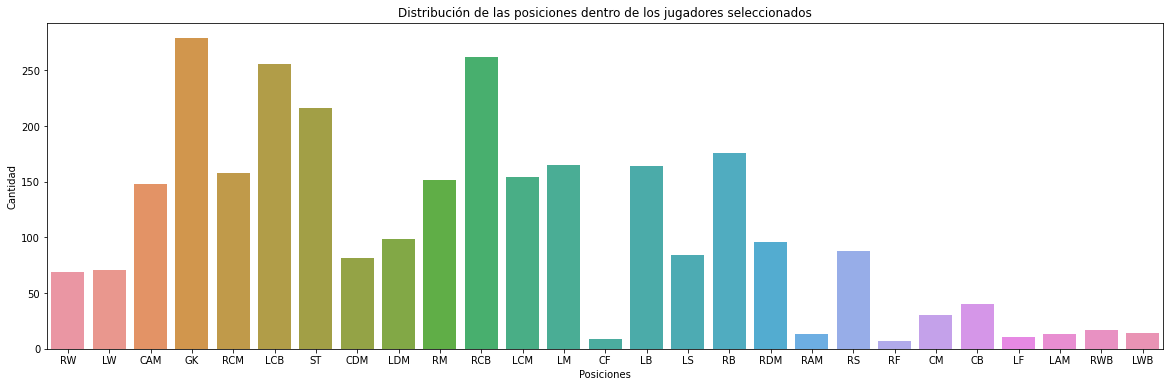

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot('team_position', data = df_n )
plt.xlabel('Posiciones')
plt.ylabel('Cantidad')
plt.title('Distribución de las posiciones dentro de los jugadores seleccionados')
plt.show()

In [ ]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

print('Examinamos los skills de los jugadores para ver aquellos donde hay más variaciones entre jugadores.')
for i in range(len(skills_ratings)):
  if df_skills[skills_ratings[i]].std()>18:
    print(skills_ratings[i] + ' Desvio ' + str(df_skills[skills_ratings[i]].std()))

Examinamos los skills de los jugadores para ver aquellos donde hay más variaciones entre jugadores.
attacking_crossing Desvio 19.319283596709663
attacking_finishing Desvio 20.789388570779202
attacking_heading_accuracy Desvio 18.53551940810362
attacking_volleys Desvio 19.594480802204092
skill_dribbling Desvio 19.2287559981749
skill_curve Desvio 19.84128971238027
skill_fk_accuracy Desvio 19.584216328274334
power_long_shots Desvio 20.11233564607256
mentality_interceptions Desvio 22.046298634327165
mentality_positioning Desvio 20.912662052974113
defending_marking Desvio 21.712086205900132
defending_standing_tackle Desvio 23.583997400917855
defending_sliding_tackle Desvio 23.605862273089134
goalkeeping_diving Desvio 19.748605660556983
goalkeeping_handling Desvio 18.784193411585587
goalkeeping_kicking Desvio 18.14132380595186
goalkeeping_positioning Desvio 19.308822692870784
goalkeeping_reflexes Desvio 20.19866775492454


## 2. Evaluación visual e intuitiva de a dos variables a la vez

### Tomamos variables de 2 grupos distintos (mentality y goalkeeping), optando por aquellas donde más varianza hay entre jugadores: 

In [ ]:
#Elegimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1='goalkeeping_diving'
skill_2='mentality_positioning'

data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=700,height=600)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Podemos observar que los dos grupos se ven bien diferenciados entre sí, porque los arqueros poseen habilidades muy distintas al resto de los jugadores.

In [ ]:
#Elegimos dos variables
skill_1='defending_sliding_tackle'
skill_2='mentality_positioning'

data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club'],
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=700,height=600)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Si cambiamos únicamente la variable de goalkeeping (relacionada a los arqueros) por otra como defending_sliding_tackle, vemos como la forma cambia para los jugadores, excluyendo a los arqueros (que anteriormente tenían un valor alto en goalkeeping_diving).

### Preprocesamiento: Normalización de las variables skills



In [ ]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

norm = Normalizer()
scaler = StandardScaler()
minmax = MinMaxScaler()
df_norm = norm.fit_transform(df_skills)
df_scaler = scaler.fit_transform(df_skills)
df_minmax = minmax.fit_transform(df_skills)

## 3. Uso de técnicas de clustering

### 1. K-Means

#### Elbow Method: buscando el mejor número de clusters

Text(0, 0.5, 'Inertia')

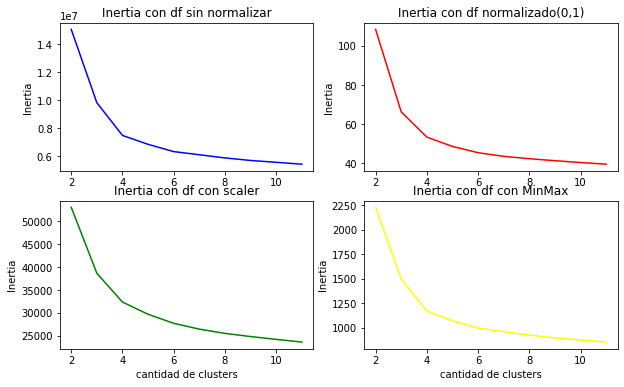

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
# y comparamos según el dataframe sin normalizar y con normalización
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]
scores1 = [KMeans(n_clusters=i+2).fit(df_norm).inertia_ for i in range(10)]
scores2 = [KMeans(n_clusters=i+2).fit(df_scaler).inertia_ for i in range(10)]
scores3 = [KMeans(n_clusters=i+2).fit(df_minmax).inertia_ for i in range(10)]

plt.figure(figsize=(10,6))
plt.subplot(2,2,1),plt.plot(np.arange(2, 12), scores,color='Blue')
plt.title("Inertia con df sin normalizar")
plt.ylabel("Inertia")
plt.subplot(2,2,2),plt.plot(np.arange(2, 12), scores1,color='Red')
plt.title("Inertia con df normalizado(0,1)")
plt.ylabel("Inertia")
plt.subplot(2,2,3),plt.plot(np.arange(2, 12), scores2,color='Green')
plt.title("Inertia con df con scaler")
plt.xlabel('cantidad de clusters')
plt.ylabel("Inertia")
plt.subplot(2,2,4),plt.plot(np.arange(2, 12), scores3,color='Yellow')
plt.title("Inertia con df con MinMax")
plt.xlabel('cantidad de clusters')
plt.ylabel("Inertia")

No se ven variaciones según si el dataset está normalizado y con qué función.

Elegimos utilizar 4 clusters gracias a Elbow method.



In [66]:
km = KMeans(n_clusters=4)
km.fit(df_scaler)
# Recuperacion de etiquetas
clusters = km.labels_

In [67]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1) 

Kmeans encontró:  4


In [68]:
#Media de las variables por cluster
media_clusters = df_clusters.groupby(by='kmeans',as_index=False).mean()

In [69]:
#Buscamos variables que tengan mucho desvío entre clusters, para poder graficarlas mejor
for i in range(len(skills_ratings)):
  if media_clusters[skills_ratings[i]].std()>25:
    print(skills_ratings[i] + ' Desvio ' + str(media_clusters[skills_ratings[i]].std()))

attacking_finishing Desvio 25.89402130169185
attacking_heading_accuracy Desvio 25.878719052430917
skill_dribbling Desvio 27.46585534791885
power_long_shots Desvio 25.601804258588434
mentality_interceptions Desvio 26.741908852897378
mentality_positioning Desvio 27.668999295708424
defending_marking Desvio 26.918117896932348
defending_standing_tackle Desvio 29.464846081993823
defending_sliding_tackle Desvio 28.880452010542644


#### Graficamos Kmeans

In [70]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Elijo dos números entre 0 y  de n_skills-1
skill_1='defending_sliding_tackle'
skill_2='skill_dribbling'

kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=700,height=700)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")
#iplot(fig)

### 2. Mean Shift


#### Buscamos el mejor hiperparámetro para el MeanShift

In [71]:
#Buscamos el mejor parámetro para el bandwidth
for i in range(1,6):
  ms = MeanShift(bandwidth=i)
  ms.fit(df_scaler)
  ms_clusters = len(np.unique(ms.labels_))
  print('bandwidth ' + str(i) )
  print("Numero estimado de clusters para Mean Shift : %d" % ms_clusters)
 

bandwidth 1
Numero estimado de clusters para Mean Shift : 2873
bandwidth 2
Numero estimado de clusters para Mean Shift : 1906
bandwidth 3
Numero estimado de clusters para Mean Shift : 115
bandwidth 4
Numero estimado de clusters para Mean Shift : 4
bandwidth 5
Numero estimado de clusters para Mean Shift : 2


In [72]:
#Elegimos el bandwidth 4, ya que es un número de clústers más fácil de observar y analizar
ms = MeanShift(bandwidth=4)
ms.fit(df_scaler)
clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)


Numero estimado de clusters para Mean Shift : 4


In [73]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  4 clusters, según los hiperparámetros elegidos


#### Graficamos MeanShift

In [74]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86
#Seguimos analizando con los mismos skills de antes
skill_1='defending_sliding_tackle'
skill_2='skill_dribbling'

MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=800,height=800)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")
#iplot(fig)

Vemos 3 grandes grupos pese a que el algoritmo nos devuelve 4 clústers... esto es porque hay 1 cluster con un jugador sólo (punto de otro color junto a los arqueros).

### 3. Jerárquico

#### Dendograma

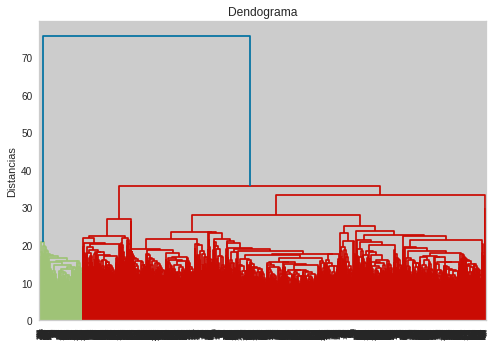

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_scaler, metric = "cityblock", method = "average"))

plt.title('Dendograma')
plt.ylabel('Distancias')
plt.show()

#### AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#Elegimos 3 clusters porque en el dendograma vemos 3 grandes agrupamientos.
n_clusters=3
agg_cluster=AgglomerativeClustering(n_clusters=n_clusters, linkage="average", affinity="cityblock")

agg_cluster.fit(df_scaler)

clusters3 = agg_cluster.labels_

labels_unique = np.unique(clusters3)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Agglomerative : %d" % n_clusters_)

Numero de clusters encontrado por Agglomerative : 3


In [77]:
df_clusters['Agglomerative'] = agg_cluster.labels_ #clusters3
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')
print('AgglomerativeClustering encontró ', max(agg_cluster.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  4 clusters, según los hiperparámetros elegidos
AgglomerativeClustering encontró  3 clusters, según los hiperparámetros elegidos


In [75]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Agglomerative",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=800,height=800)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")
#iplot(fig)

El Agglomerative Clustering devolvió 3 clusters perfectamente observables y que coincide mucho con la distribución del MeanShift (sacando el cluster con 1 jugador).

## 4. Análisis de los clusters encontrados.

El primer análisis que hay para destacar de los clusters, es que aunque varien las cantidades, hay 2 diferencias abruptas entre arqueros y no arqueros.


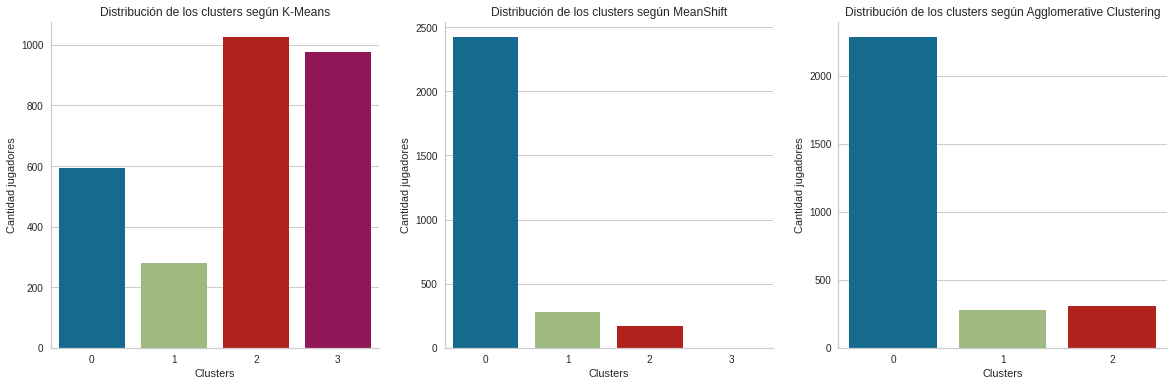

In [100]:
plt.figure(figsize=(20,6))
plt.subplot(131),sns.countplot(data=df_clusters, x=df_clusters.kmeans)
plt.title("Distribución de los clusters según K-Means")
plt.xlabel("Clusters")
plt.ylabel("Cantidad jugadores")
plt.subplot(132),sns.countplot(data=df_clusters, x=df_clusters.MeanShift)
plt.title("Distribución de los clusters según MeanShift")
plt.xlabel("Clusters")
plt.ylabel("Cantidad jugadores")
plt.subplot(133),sns.countplot(data=df_clusters, x=df_clusters.Agglomerative)
plt.title("Distribución de los clusters según Agglomerative Clustering")
plt.xlabel("Clusters")
plt.ylabel("Cantidad jugadores")
sns.despine()

Vemos que la distribución de los clusters difiere mucho entre K-means y el resto de los métodos, pero hay mucha similitud entre MeanShift y Agglomerative.
En la siguiente tabla vamos a ver si los grupos terminaron con los mismos jugadores o no.

In [107]:
#Comparando los grupos de Kmeans y MS observamos que coinciden sólo en un grupo (el de GK), y los demás grupos están conformados diferentes.
pd.crosstab(df_clusters.kmeans, df_clusters.MeanShift)

MeanShift,0,1,2,3
kmeans,,,,
0,422,0,172,0
1,0,278,0,1
2,1025,0,0,0
3,975,0,0,0


In [108]:
#Comparando MeanShift y Agglomerative, que visualmente parecían muy similares, vemos que difieren poco en los dos primeros grupos,
# pero en el último, cambian mucho.
pd.crosstab(df_clusters.Agglomerative, df_clusters.MeanShift)

MeanShift,0,1,2,3
Agglomerative,,,,
0,2276,0,8,0
1,0,278,0,1
2,146,0,164,0


In [115]:
df_clusters[df_clusters.team_position=='GK'].pivot_table(values=['kmeans','MeanShift','Agglomerative'],columns=['team_position'],aggfunc='count')

team_position,GK
Agglomerative,279
MeanShift,279
kmeans,279


In [85]:
df_clusters.groupby(by=['kmeans','MeanShift','Agglomerative'])['team_position'].count()

kmeans  MeanShift  Agglomerative
0       0          0                 277
                   2                 145
        2          0                   8
                   2                 164
1       1          1                 278
        3          1                   1
2       0          0                1024
                   2                   1
3       0          0                 975
Name: team_position, dtype: int64

Elegimos estas 2 skills por la diferencia de varianzas, pero también porque eran habilidades que permiten diferenciar muy bien los clusters en todos los métodos utilizados.

In [ ]:
interesting_skills=[skill_1,skill_2]
df_clusters.groupby(by=['kmeans'])[interesting_skills].describe().T

kmeans                              0      1      2       3      4
defending_sliding_tackle count 630.00 584.00 279.00 1014.00 366.00
                         mean   35.07  72.82  14.19   69.52  24.99
                         std    11.18   4.89   3.07    7.93   9.26
                         min    11.00  57.00   8.00   40.00  10.00
                         25%    26.00  70.00  12.00   65.00  19.00
                         50%    34.00  72.00  14.00   70.00  23.00
                         75%    42.75  76.00  16.00   75.00  30.00
                         max    69.00  89.00  24.00   90.00  62.00
skill_dribbling          count 630.00 584.00 279.00 1014.00 366.00
                         mean   77.86  52.96  15.61   71.91  71.43
                         std     5.09  10.36   4.25    6.08   5.65
                         min    64.00  22.00   7.00   43.00  53.00
                         25%    74.00  45.00  13.00   68.00  67.00
                         50%    77.00  54.00  15.00   72.00  71.00
                         75%    81.00  61.00  18.00   76.00  75.00
                         max    97.00  75.00  30.00   90.00  89.00

In [ ]:
centroide_km=pd.DataFrame(data=km.cluster_centers_, columns=skills_ratings)
centroide_ms=pd.DataFrame(data=ms.cluster_centers_, columns=skills_ratings)

In [ ]:
centroide_km.describe()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
mean,-0.33,-0.16,-0.21,-0.36,-0.18,-0.31,-0.28,-0.26,-0.37,-0.33,-0.18,-0.17,-0.20,-0.04,-0.23,-0.13,-0.00,-0.33,0.03,-0.25,-0.29,-0.35,-0.23,-0.20,-0.18,-0.21,-0.34,-0.36,-0.35,0.34,0.34,0.34,0.34,0.34
std,1.17,1.25,1.31,1.30,1.19,1.32,1.15,1.04,1.12,1.37,0.91,0.89,0.95,0.25,0.89,0.90,0.41,1.16,0.77,1.20,1.10,1.11,1.28,0.88,1.15,0.83,1.11,1.13,1.12,1.49,1.49,1.48,1.49,1.49
min,-2.22,-1.94,-2.41,-2.63,-1.92,-2.51,-2.07,-1.86,-2.22,-2.70,-1.50,-1.55,-1.41,-0.44,-1.35,-1.23,-0.56,-2.36,-1.01,-2.12,-2.04,-1.60,-2.18,-1.17,-1.97,-1.63,-1.71,-1.69,-1.58,-0.33,-0.33,-0.33,-0.34,-0.33
25%,-0.57,-0.90,-0.34,-0.11,-0.84,-0.57,-0.76,-0.68,-0.57,-0.31,-0.65,-0.49,-0.88,-0.08,-0.77,-0.95,-0.27,-0.05,-0.38,-0.81,-0.55,-1.08,-0.85,-1.08,-0.64,-0.24,-0.94,-1.07,-1.13,-0.33,-0.33,-0.33,-0.32,-0.32
50%,-0.08,0.17,0.18,0.01,0.23,0.40,0.21,0.09,-0.02,0.35,0.18,0.14,0.04,0.01,-0.26,0.33,0.07,0.05,-0.01,0.43,-0.04,-0.69,0.35,0.07,0.22,0.22,-0.67,-0.66,-0.70,-0.32,-0.32,-0.32,-0.32,-0.32
75%,0.56,0.80,0.72,0.40,0.72,0.42,0.47,0.41,0.29,0.43,0.18,0.30,0.27,0.04,0.35,0.45,0.37,0.12,0.70,0.57,0.53,0.77,0.69,0.48,0.61,0.25,0.72,0.76,0.76,-0.32,-0.31,-0.32,-0.32,-0.32
max,0.66,1.08,0.78,0.53,0.92,0.73,0.74,0.73,0.64,0.58,0.87,0.75,0.98,0.26,0.90,0.76,0.38,0.59,0.84,0.67,0.68,0.85,0.86,0.71,0.86,0.35,0.88,0.88,0.90,3.01,3.00,2.99,3.00,3.01


In [ ]:
centroide_ms.describe()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
mean,-1.40,-1.36,-1.01,-1.92,-1.17,-1.72,-0.61,-0.48,-1.77,-1.58,-0.96,-0.81,-1.29,-0.18,-0.97,-0.85,0.23,-1.07,-0.04,-1.54,-0.77,-0.45,-1.42,-0.98,-1.24,-1.70,-0.50,-0.61,-0.56,1.30,1.34,1.27,1.28,1.27
std,1.34,1.14,1.66,1.91,1.08,1.52,1.36,1.49,1.53,1.46,0.94,1.20,1.24,0.25,1.00,0.79,0.60,1.73,0.87,1.34,1.44,1.28,1.23,1.16,1.04,1.82,1.19,1.39,1.32,1.81,1.82,2.02,1.93,1.92
min,-2.39,-2.19,-2.45,-4.06,-2.02,-2.96,-2.07,-1.87,-2.80,-2.72,-1.80,-2.13,-2.60,-0.54,-1.95,-1.34,-0.23,-2.78,-0.87,-2.37,-2.04,-1.59,-2.18,-2.36,-1.96,-4.16,-1.72,-1.93,-1.80,-0.32,-0.32,-0.64,-0.46,-0.45
25%,-2.26,-2.00,-2.42,-3.00,-1.94,-2.62,-1.62,-1.68,-2.60,-2.66,-1.56,-1.68,-1.82,-0.25,-1.50,-1.27,-0.06,-2.45,-0.48,-2.19,-1.99,-1.51,-2.14,-1.49,-1.89,-2.22,-1.41,-1.75,-1.64,-0.23,-0.19,-0.40,-0.36,-0.36
50%,-1.86,-1.77,-1.17,-2.03,-1.48,-2.19,-0.49,-0.59,-2.39,-2.01,-1.20,-0.71,-1.48,-0.09,-1.17,-1.21,0.01,-1.01,-0.24,-2.12,-0.83,-0.53,-1.96,-1.01,-1.63,-1.43,-0.47,-0.63,-0.58,1.27,1.34,1.33,1.29,1.27
75%,-1.00,-1.13,0.24,-0.95,-0.70,-1.28,0.51,0.61,-1.56,-0.92,-0.60,0.15,-0.95,-0.02,-0.64,-0.79,0.29,0.37,0.19,-1.47,0.40,0.53,-1.24,-0.50,-0.97,-0.91,0.45,0.51,0.50,2.80,2.87,3.00,2.93,2.90
max,0.53,0.31,0.73,0.43,0.32,0.45,0.60,1.15,0.49,0.41,0.34,0.30,0.39,0.01,0.41,0.33,1.11,0.50,1.19,0.46,0.62,0.87,0.41,0.46,0.28,0.22,0.67,0.74,0.74,3.00,2.99,3.06,3.00,2.99


## 5. Embeddings y técnicas de clustering.

### T-SNE

In [ ]:
n_sne=2000 #elegir numero pequeño para agilidad en el cálculo luego
df_sne=df.loc[:n_sne]
X=df_sne[skills_ratings]

In [ ]:
#Transformamos el espacio de dimensión 34 en un espacio de dimensión 2 (n_components=2)

from sklearn import (manifold, decomposition)

import time
time_start = time.time()

tsne = manifold.TSNE(n_components=3, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4477 samples in 0.018s...
[t-SNE] Computed neighbors for 4477 samples in 0.973s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4477
[t-SNE] Computed conditional probabilities for sample 2000 / 4477
[t-SNE] Computed conditional probabilities for sample 3000 / 4477
[t-SNE] Computed conditional probabilities for sample 4000 / 4477
[t-SNE] Computed conditional probabilities for sample 4477 / 4477
[t-SNE] Mean sigma: 12.382976
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.649307
[t-SNE] KL divergence after 1000 iterations: 1.591760
t-SNE done! Time elapsed: 187.01180911064148 seconds


**El resultado (X_tsne) se guarda en una arreglo numpy** de tamaño:
cantidad de filas = cantidad de jugadores considerados = n_tsne y
cantidad de columnas= n_components = 2 

In [ ]:
data=[]
bool_crack=df_sne["overall"] > 85 #diferenciamos a los mejores jugadores

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_sne.loc[:,'team_position'], 
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_sne.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=700,height=700)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer="colab")


In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [ ]:
df_sne["Position2"]=df_sne["team_position"].apply(lambda x: pos2(x))

df_sne["Position2"].value_counts()

nan           716
Defender      385
Forward       382
Midfielder    376
GK            142
Name: Position2, dtype: int64

#### Visualizamos los agrupamientos según 4 posiciones

In [ ]:
bool_striker= df_sne["Position2"] == 'Forward'
bool_midfielder= df_sne["Position2"] == 'Midfielder'
bool_defender= df_sne["Position2"] == 'Defender'
bool_gk= df_sne["Position2"] == 'GK'

bool_crack=df_sne["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

striker =go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      text=df_sne.loc[bool_striker,'short_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

midfielder =go.Scatter(x=X_tsne[bool_midfielder,0], y=X_tsne[bool_midfielder,1],name='Midfielder',
                      text=df_sne.loc[bool_midfielder,'short_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender =go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      text=df_sne.loc[bool_defender,'short_name'],
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

gk =go.Scatter(x=X_tsne[bool_gk,0], y=X_tsne[bool_gk,1],name='GK',
                      text=df_sne.loc[bool_gk,'short_name'],
                      opacity=0.4,marker=dict(color=palette[4],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_sne.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[striker,midfielder,defender,gk,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=800,height=800)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")
#iplot(fig)


Vemos que al agregarle las 4 posiciones generales, están las manchas más juntas, pero superpuestas. Esto seguramente debe ser porque muchos jugadores suelen tener características mixtas entre posiciones. Esto en los mediocampistas es más evidente, por eso los puntos están más esparcidos en el espacio.

### PCA

In [ ]:
n_acp=18000

df_acp=df.loc[:n_acp]
df_acp=df_acp[(df_acp["team_position"]!='GK')&(df['overall']>70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                  'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']

X=df_acp[skills_ratings] # Datos para proyectar sólo numéricos
print('los datos tienen dimensión n= ',len(skills_ratings))

los datos tienen dimensión n=  29


In [ ]:
#Estandarizamos los datos con StandarScaler
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X) # numpyarray normalizado por columna

In [ ]:
pca=decomposition.PCA(n_components=5) 

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)


proporción de varianza por componente:  [0.42309674 0.20485038 0.08722664 0.06176105 0.03599258]
proporción de varianza por componente acumulada:  [0.42309674 0.62794712 0.71517376 0.77693481 0.81292739]
tamaño de los datos:  (4477, 5)


La primera componente proporciona el 42% de la variación de los datos.
Con 4 componentes explicamos un 77% de los datos.

In [ ]:
print (X_projected[0:5])#5 primeros jugadores, n_components

[[-8.87301479  0.8191571   1.17822921  0.79365028  3.67461106]
 [-7.51225514  0.55342474  3.18899728 -2.30205454  3.86276431]
 [-8.23066109  1.81321931  0.26431397  0.72399978  3.28377828]
 [-7.76700131  1.45989285  0.26400544  0.46109195  2.84223674]
 [-7.12422283 -1.84703605  1.46656578  1.53961304  2.41393275]]


In [ ]:
pcs=pca.components_  #"composición" de las primeras componentes, 
print(pcs)  # el aporte/pesos de las variables: skills_ratings

[[-0.23765653 -0.24105265 -0.03136285 -0.22453356 -0.23879365 -0.26680443
  -0.25232254 -0.22473373 -0.16643819 -0.25803595 -0.18831058 -0.16826564
  -0.21658182 -0.10303227 -0.19759165 -0.19924428  0.02763746 -0.15520994
   0.10272729 -0.25300678 -0.01395812  0.02628776 -0.25711715 -0.23028078
  -0.21627847 -0.169171    0.02190381  0.02584986  0.03641161]
 [-0.07056686  0.11381001 -0.22914943 -0.19667048  0.07728969 -0.02423714
  -0.00282952 -0.00110701 -0.23655329 -0.09870075  0.08254585  0.06230782
   0.08948648 -0.08515852  0.0510206   0.04349136 -0.102186   -0.18841049
  -0.16804757  0.017913   -0.32657394 -0.38281162  0.05080054  0.02018447
   0.04925417 -0.13170137 -0.37782538 -0.38735278 -0.38066855]
 [-0.14050922  0.18667981  0.31270107  0.00203716  0.20466497 -0.04147667
  -0.00132166  0.06005958 -0.06974486  0.02063625 -0.31312807 -0.26898685
  -0.29006008  0.13554748 -0.32640389  0.2520582   0.05400725 -0.12038172
   0.38027231  0.13827592  0.12231877 -0.11271046  0.1024435

#### Composición de los pesos de las primeras 2 componentes

In [ ]:
data=[]

for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=X.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=650,height=650,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")
#plot(fig)

En este gráfico podemos observar mejor la correlación entre las variables. Features como las "defending", están bien relacionadas entre sí y se muestran bien juntas en la parte inferior del gráfico.
El largo de la línea tiene que ver con las varianza de las features. Coinciden muchas con las que seleccionamos anteriormente para visualizar los puntos en meanshift y Kmeans.

#### PCA con Kmeans

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

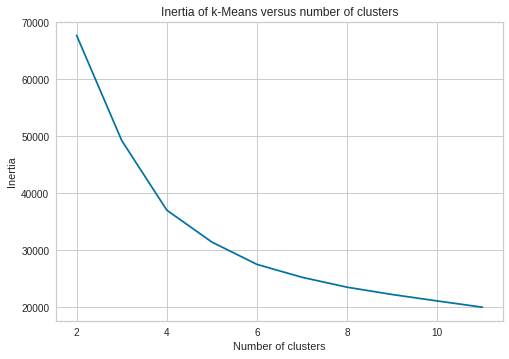

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(X_projected).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
#intertia: within-cluster sum-of-squares 

In [ ]:
#Ahora calculamos Kmeans
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(X_projected)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)


Suma de los cuadrados de las distancias al cluster / Inertia:  31460.016867833638


In [ ]:
data=[]
bool_crack=df_acp["overall"] > 85
bool_no_crack=df_acp["overall"]<86

kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=df_acp.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Top players',
                      text=df_acp.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,acp_crack]

layout = go.Layout(title="ACP + Clustering Kmeans ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer="colab")

Aprovechamos los datos del PCA para aplicar Kmeans y visualizar los clusters encontrados.
Se pueden distinguir 2 grupos grandes (arqueros y no-arqueros) como en todos los puntos anteriores, pero ahora los no-arqueros se subdividen en 4 subgrupos. 
De estos últimos, 2 grupos aparecen separados como por una línea imaginaria, sin mezclarse entre sí, algo que no ocurría anteriormente.

## 6. Evaluación

For n_clusters = 2 The average silhouette_score is : 0.6682155181740133
For n_clusters = 3 The average silhouette_score is : 0.3809599054255487
For n_clusters = 4 The average silhouette_score is : 0.3228273987113864
For n_clusters = 5 The average silhouette_score is : 0.28322885824500776
For n_clusters = 6 The average silhouette_score is : 0.22666585956369256


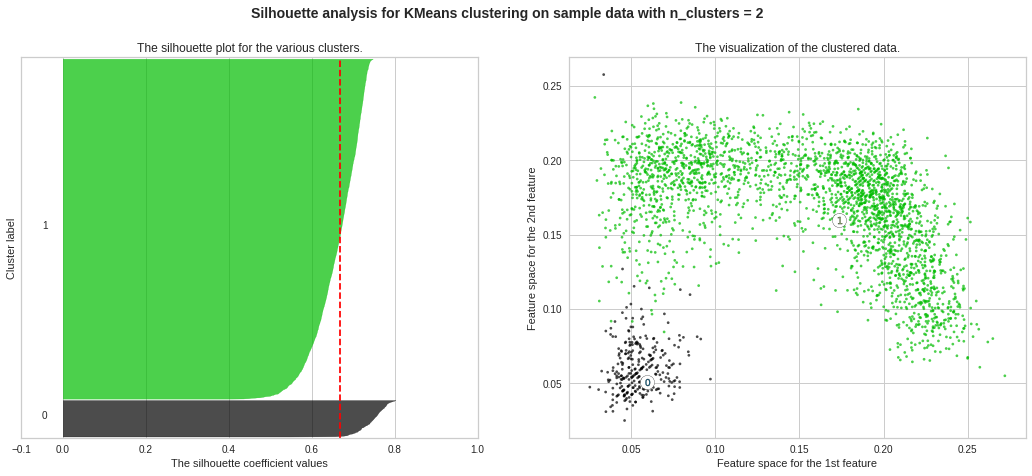

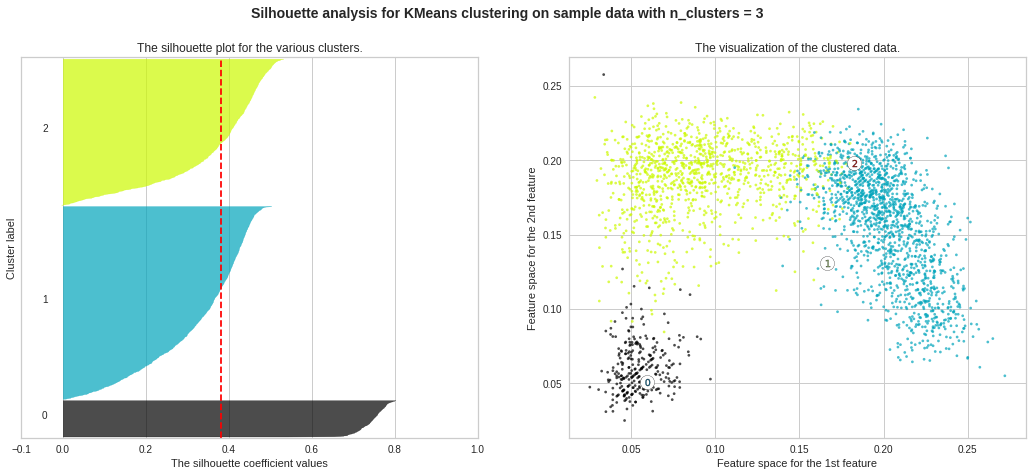

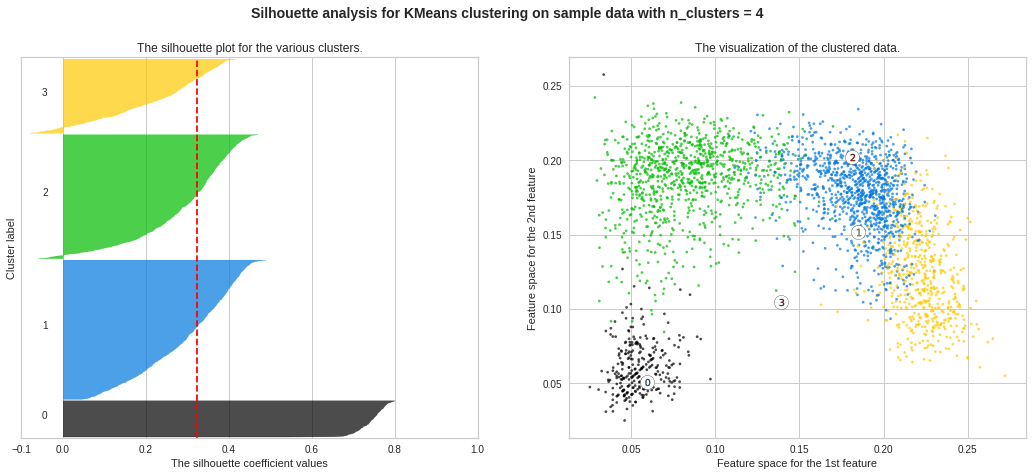

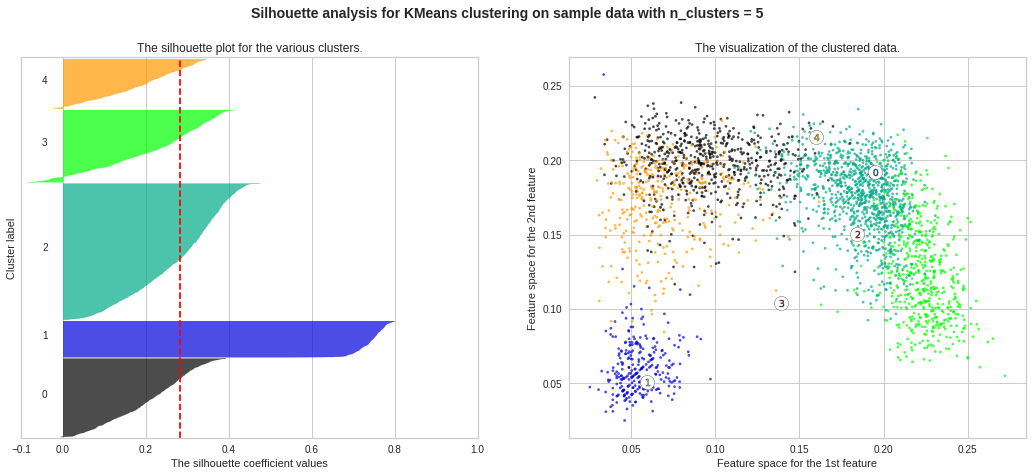

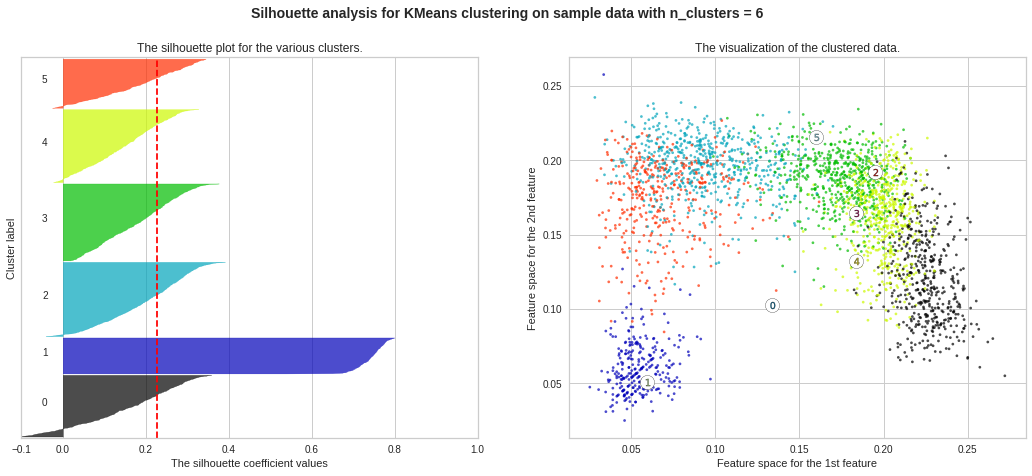

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np.array(df_norm)) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(np.array(df_norm))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(np.array(df_norm), cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(np.array(df_norm), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #skill_1='defending_sliding_tackle'
    #skill_2='skill_dribbling'
    ax2.scatter(np.array(df_norm)[:,28], np.array(df_norm)[:, 6], 
                marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
skills_ratings
#'defending_sliding_tackle'
#skill_2='skill_dribbling'

['attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

## 7. Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué ?

Probamos varios métodos de normalización, porque si bien las variables que utilizamos son todas numéricas (con valores del 0 al 100), resulta que no todas están igual escaladas.
Dado que la mayoría de los algoritmos de clustering forman grupos a partir de las distancias, tenemos que garantizar que todos los datos estén a escalas similares.
Nos decidimos por el StandardScaler porque era con el único que podíamos obtener más grupos en MeanShift.
